In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("out.dat", sep=' ',names=["Easting","Northing","Obs","Calc","Residuals"])
df

,Easting,Northing,Obs,Calc
0,535843.289625,4.069294e+06,-0.220017,1.647337
1,535843.223230,4.069297e+06,0.060021,1.659524
2,535843.156118,4.069299e+06,0.439363,1.671385
3,535843.088408,4.069301e+06,0.419423,1.682979
4,535843.021542,4.069303e+06,0.199467,1.694221
...,...,...,...,...
503,535815.605398,4.070391e+06,0.125328,0.979684
504,535815.491836,4.070393e+06,-0.100536,0.969388
505,535815.371334,4.070395e+06,-0.526322,0.959233
506,535815.243523,4.070397e+06,-0.550862,0.949149


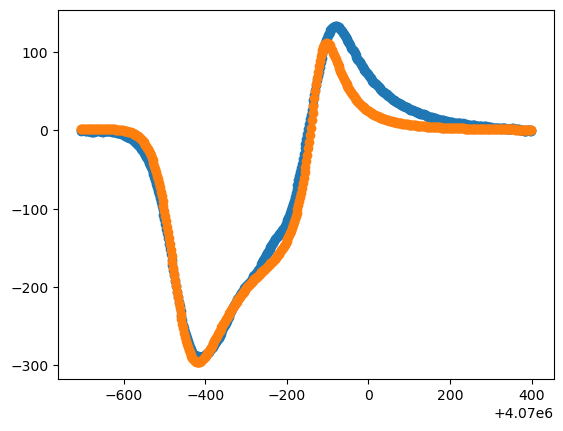

In [8]:
plt.scatter(df.Northing,df.Obs)
plt.scatter(df.Northing,df.Calc)

In [9]:
df2 = pd.read_csv("out2.dat", sep=' ',names=["Easting","Northing","Obs","Calc"])
df2

,Easting,Northing,Obs,Calc
0,535843.289625,4.069294e+06,-0.220017,1.647337
1,535843.223230,4.069297e+06,0.060021,1.659524
2,535843.156118,4.069299e+06,0.439363,1.671385
3,535843.088408,4.069301e+06,0.419423,1.682979
4,535843.021542,4.069303e+06,0.199467,1.694221
...,...,...,...,...
503,535815.605398,4.070391e+06,0.125328,0.979684
504,535815.491836,4.070393e+06,-0.100536,0.969388
505,535815.371334,4.070395e+06,-0.526322,0.959233
506,535815.243523,4.070397e+06,-0.550862,0.949149


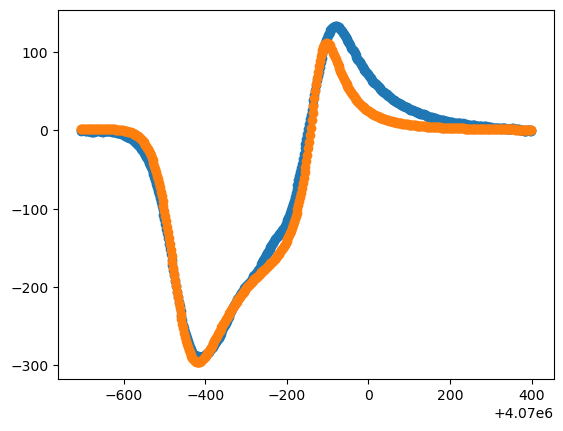

In [10]:
plt.scatter(df2.Northing,df2.Obs)
plt.scatter(df2.Northing,df2.Calc)